In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
read = pd.read_csv("Life Expectancy Data.csv", header=0)
read.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [4]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [35]:
read.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


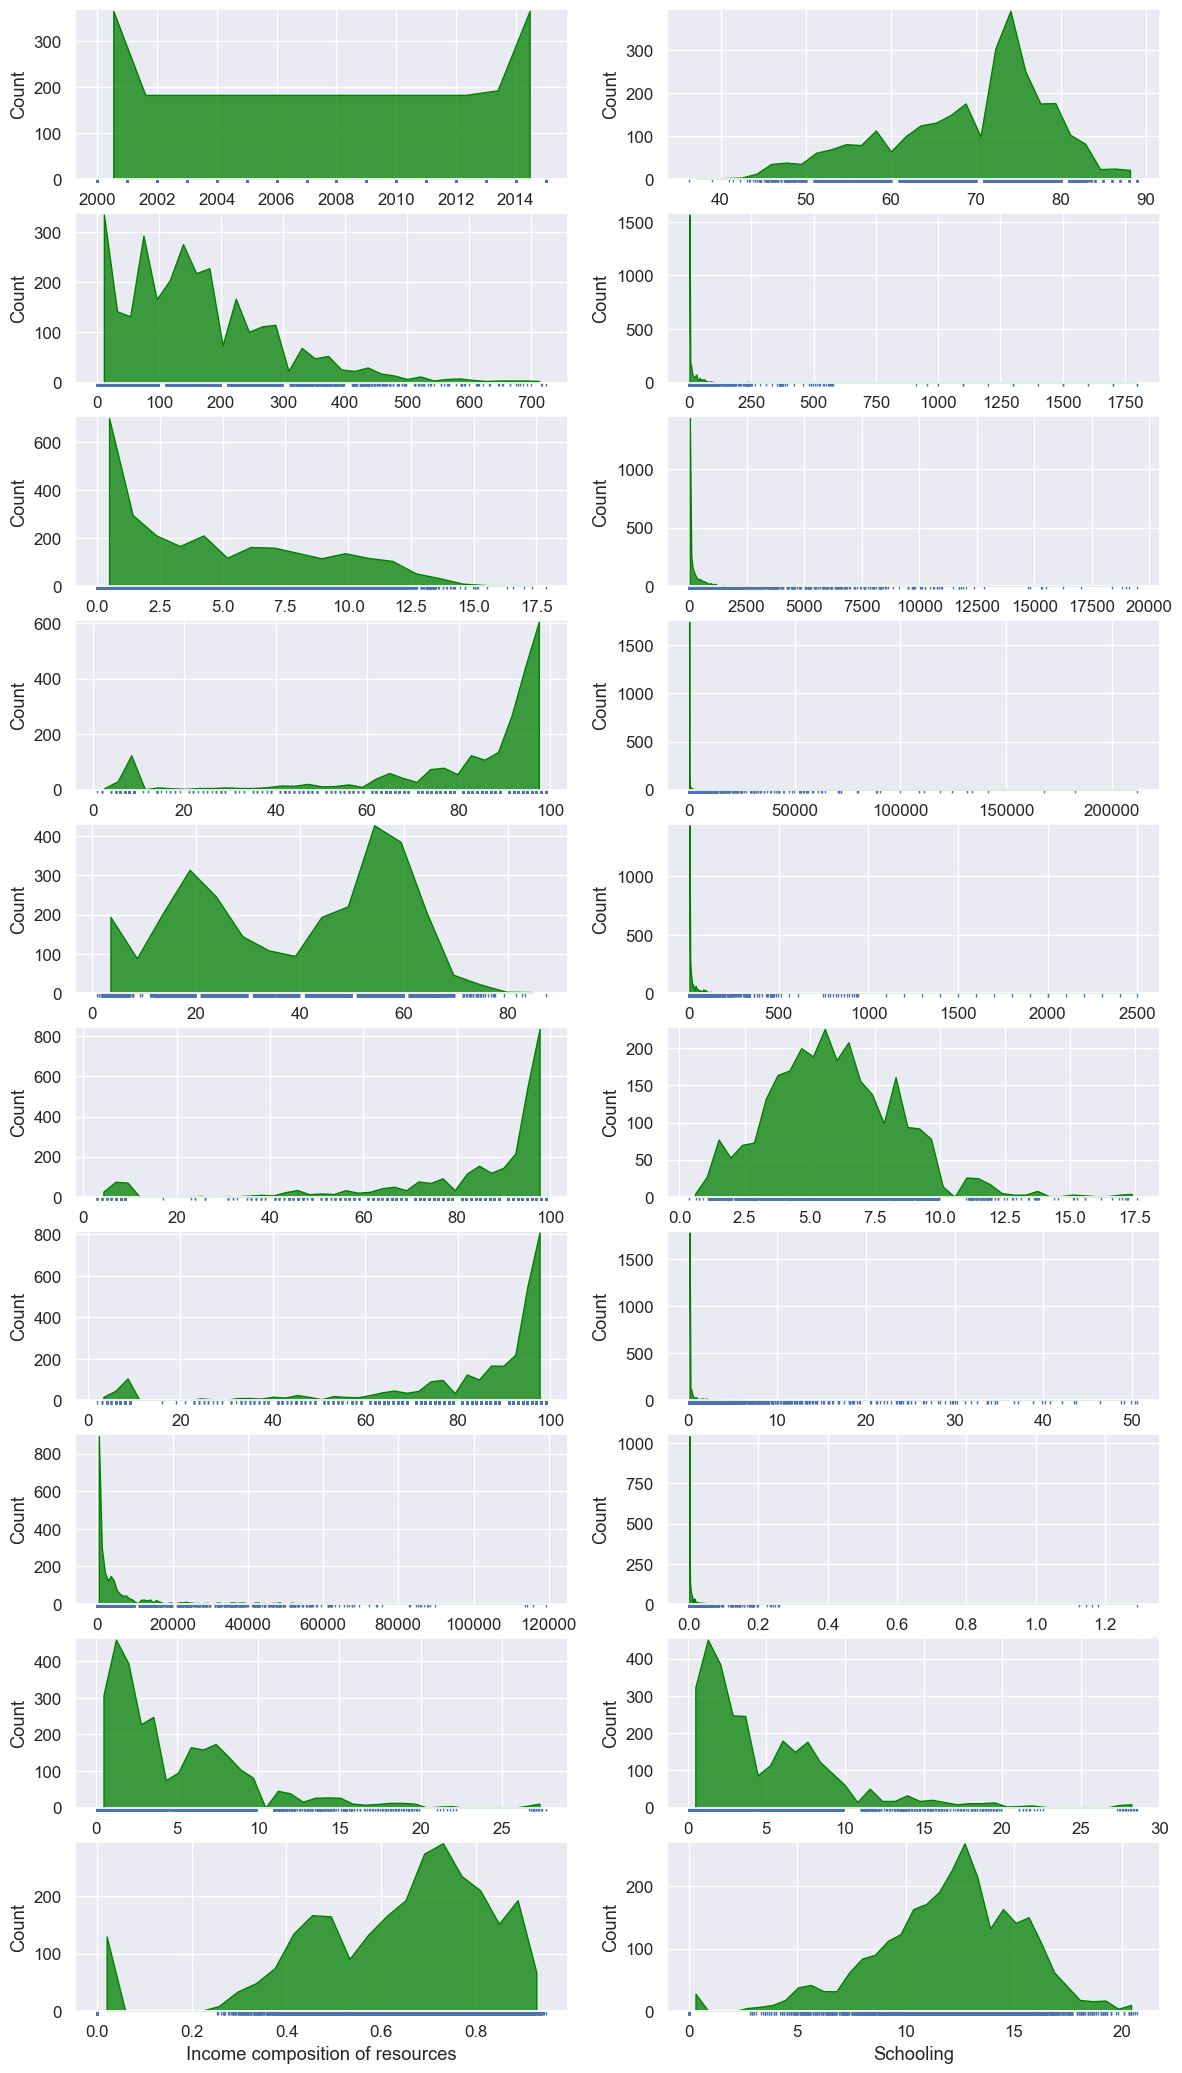

In [75]:
data_numeric = read.select_dtypes(include='number')
column_numeric = data_numeric.columns

plt.figure(figsize=(14, 26))
plt.subplots_adjust(wspace=0.2, hspace=None)

sns.set(font_scale=1.1)
i = 1
for col_name in column_numeric:
    plt.subplot(10,2,i)
    sns.histplot(data = read[col_name], element ="poly", color = "green");
    sns.rugplot(data = read[col_name], height=-0.02, clip_on=False)
    i += 1

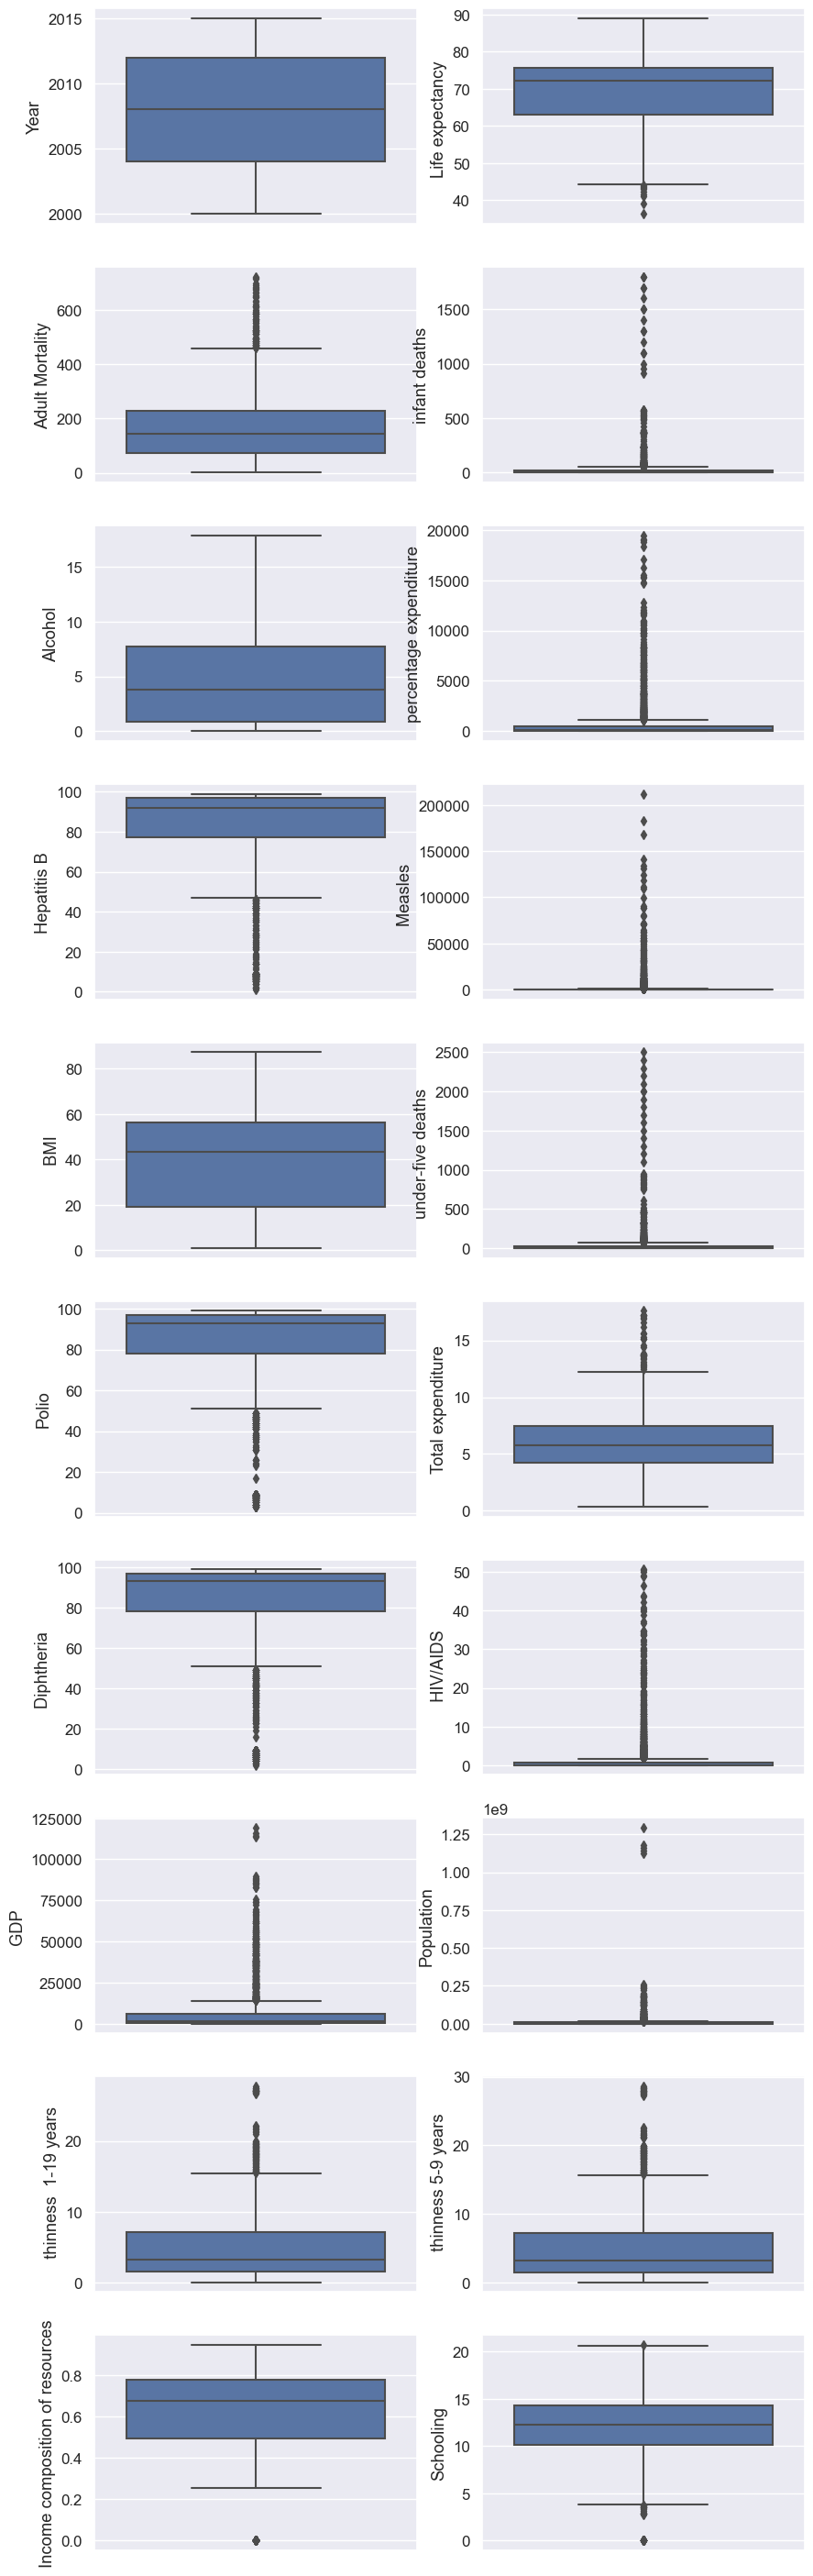

In [77]:
plt.figure(figsize=(10, 36))
plt.subplots_adjust(wspace=0.2, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(10,2,i)
    sns.boxplot(y = col_name, data = read);
    i += 1

Дисперсія

In [95]:
variance = data_numeric.var()
variance

Year                               2.128753e+01
Life expectancy                    9.070405e+01
Adult Mortality                    1.544852e+04
infant deaths                      1.390666e+04
Alcohol                            1.642205e+01
percentage expenditure             3.951805e+06
Hepatitis B                        6.285057e+02
Measles                            1.314983e+08
 BMI                               4.017633e+02
under-five deaths                  2.574277e+04
Polio                              5.488733e+02
Total expenditure                  6.241601e+00
Diphtheria                         5.624919e+02
 HIV/AIDS                          2.578390e+01
GDP                                2.036377e+08
Population                         3.722476e+15
 thinness  1-19 years              1.953812e+01
 thinness 5-9 years                2.033002e+01
Income composition of resources    4.448031e-02
Schooling                          1.128234e+01
dtype: float64

In [107]:
#Коваріація
covariance = data_numeric.cov()
covariance

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,2.128753e+01,7.466211e+00,-4.530099e+01,-2.035724e+01,-9.319021e-01,2.879982e+02,1.147744e+01,-4.364552e+03,1.007655e+01,-3.178497e+01,1.017423e+01,9.821331e-01,1.469466e+01,-3.273873e+00,6.676510e+03,4.771411e+06,-9.762649e-01,-1.059350e+00,0.236801,3.244621e+00
Life expectancy,7.466211e+00,9.070405e+01,-8.243093e+02,-2.211084e+02,1.566435e+01,7.240651e+03,5.412236e+01,-1.723845e+04,1.075074e+02,-3.405787e+02,1.035024e+02,5.161025e+00,1.079214e+02,-2.695626e+01,6.357257e+04,-1.292010e+07,-2.001529e+01,-2.017765e+01,1.431375,2.355586e+01
Adult Mortality,-4.530099e+01,-8.243093e+02,1.544852e+04,1.156193e+03,-9.939165e+01,-6.009727e+04,-4.804433e+02,4.450792e+04,-9.569895e+02,1.880456e+03,-7.980218e+02,-3.591276e+01,-8.088108e+02,3.311031e+02,-5.339286e+05,-1.074510e+08,1.658953e+02,1.723295e+02,-11.871124,-1.870545e+02
infant deaths,-2.035724e+01,-2.211084e+02,1.156193e+03,1.390666e+04,-5.627989e+01,-2.006989e+04,-5.866675e+02,6.776735e+05,-5.402210e+02,1.885700e+04,-4.730680e+02,-3.881121e+01,-4.914787e+02,1.510865e+01,-1.957971e+05,4.474351e+09,2.441097e+02,2.520228e+02,-3.679185,-7.815589e+01
Alcohol,-9.319021e-01,1.566435e+01,-9.939165e+01,-5.627989e+01,1.642205e+01,2.831145e+03,8.836352e+00,-2.454997e+03,2.675036e+01,-7.452989e+01,2.098374e+01,3.008681e+00,2.139245e+01,-1.035875e+00,2.065329e+04,-8.960531e+06,-7.731591e+00,-7.677407e+00,0.379128,7.216164e+00
percentage expenditure,2.879982e+02,7.240651e+03,-6.009727e+04,-2.006989e+04,2.831145e+03,3.951805e+06,6.460541e+02,-1.290153e+06,9.159427e+03,-2.802068e+04,6.877983e+03,8.964324e+02,6.790915e+03,-9.877866e+02,2.736831e+07,-3.389285e+09,-2.220087e+03,-2.278469e+03,164.211694,2.666523e+03
Hepatitis B,1.147744e+01,5.412236e+01,-4.804433e+02,-5.866675e+02,8.836352e+00,6.460541e+02,6.285057e+02,-2.881926e+04,7.520121e+01,-8.233259e+02,2.654561e+02,3.628483e+00,3.288785e+02,-1.446941e+01,2.681937e+04,-2.143913e+08,-1.292948e+01,-1.358915e+01,0.906997,1.643195e+01
Measles,-4.364552e+03,-1.723845e+04,4.450792e+04,6.776735e+05,-2.454997e+03,-1.290153e+06,-2.881926e+04,1.314983e+08,-4.067260e+04,9.343034e+05,-3.669537e+04,-3.118151e+03,-3.870720e+04,1.799181e+03,-1.209813e+07,1.873944e+11,1.145815e+04,1.149380e+04,-288.290230,-4.859362e+03
BMI,1.007655e+01,1.075074e+02,-9.569895e+02,-5.402210e+02,2.675036e+01,9.159427e+03,7.520121e+01,-4.067260e+04,4.017633e+02,-7.685319e+02,1.332090e+02,1.210224e+01,1.343270e+02,-2.493284e+01,8.628256e+04,-8.838424e+07,-4.713661e+01,-4.870468e+01,2.100044,3.539356e+01
under-five deaths,-3.178497e+01,-3.405787e+02,1.880456e+03,1.885700e+04,-7.452989e+01,-2.802068e+04,-8.233259e+02,9.343034e+05,-7.685319e+02,2.574277e+04,-7.116265e+02,-5.351628e+01,-7.469237e+02,3.100902e+01,-2.751755e+05,5.947125e+09,3.335774e+02,3.435245e+02,-5.628414,-1.148498e+02


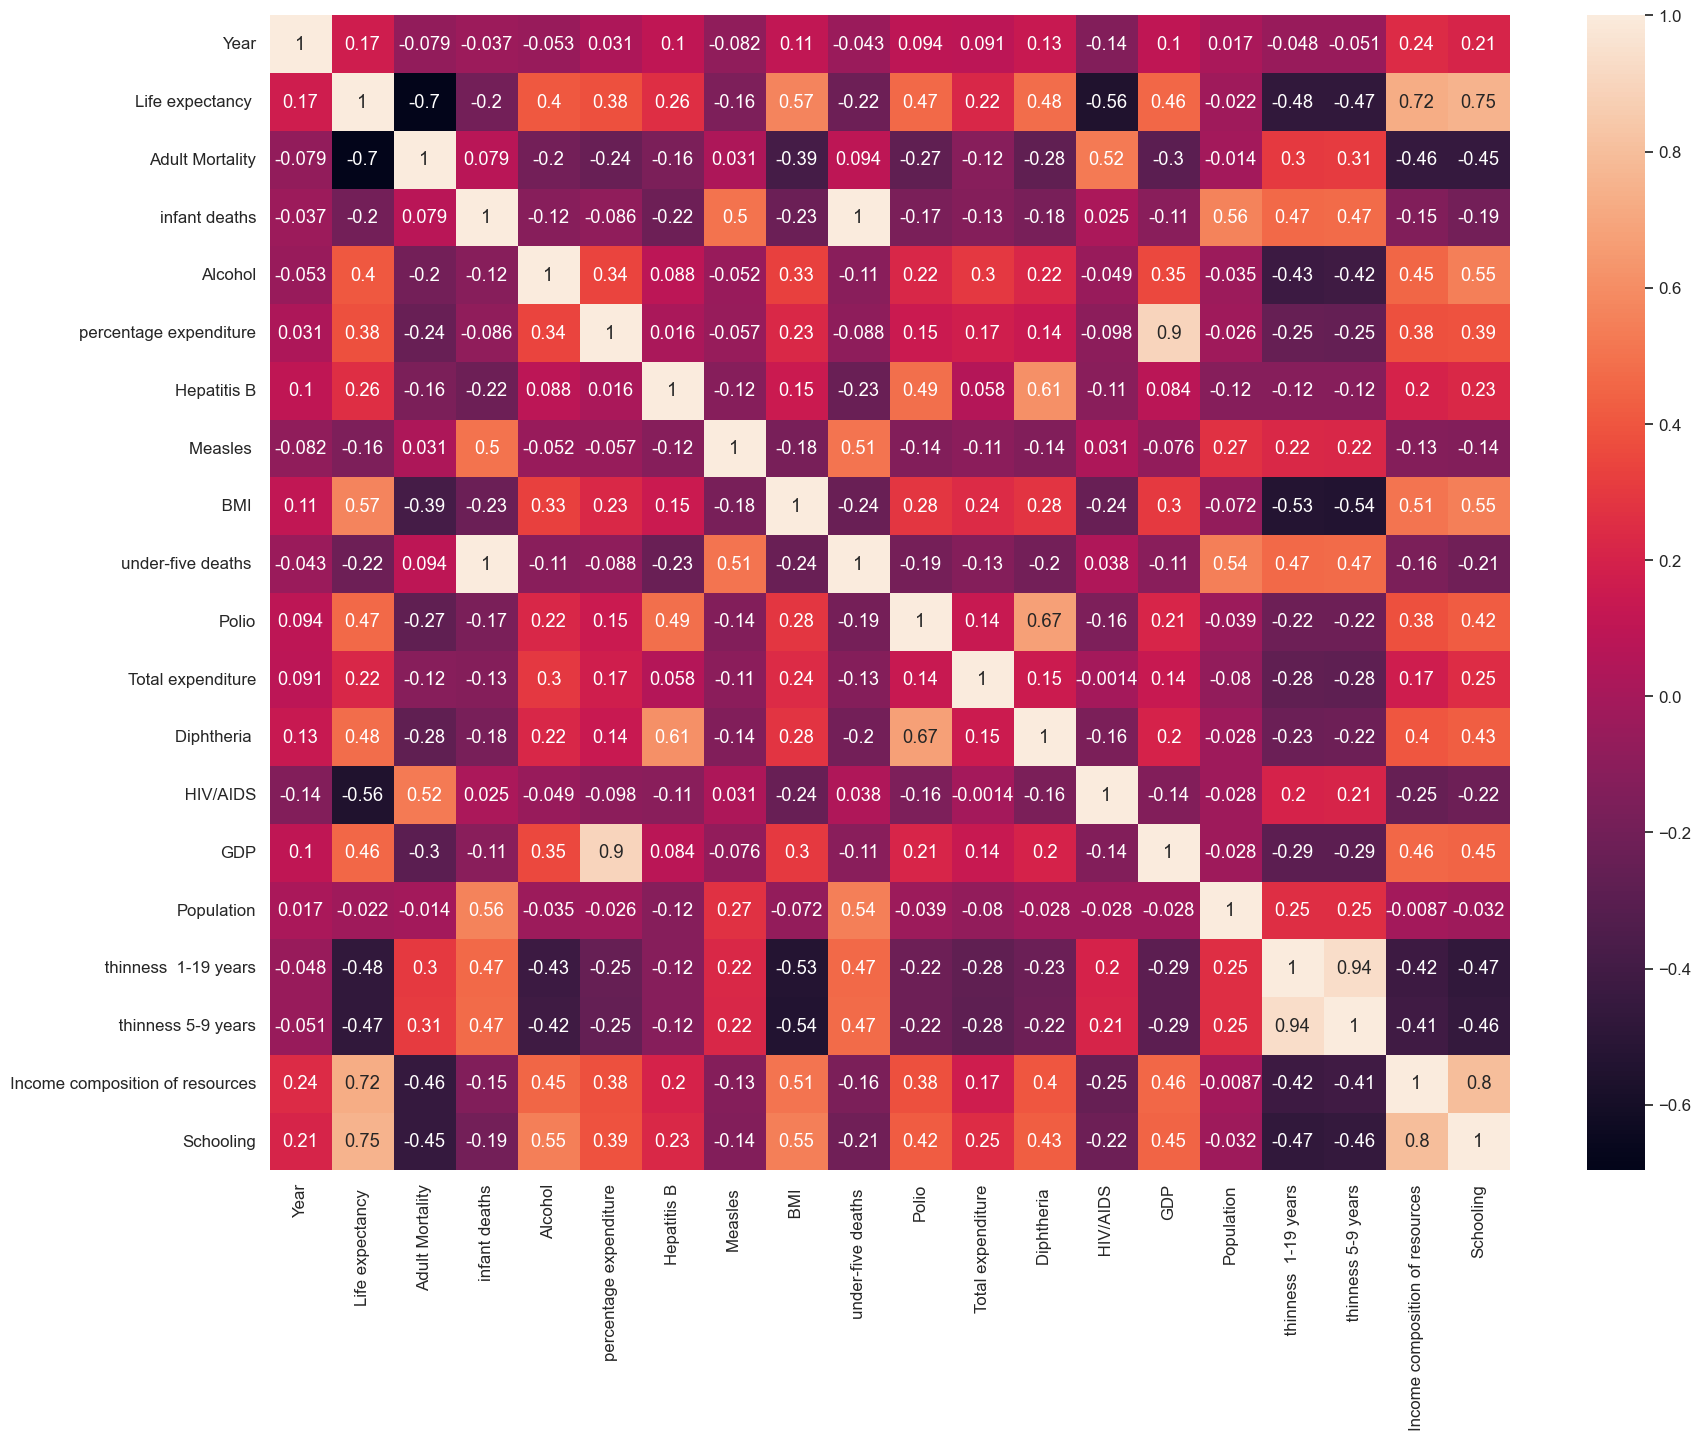

In [109]:
#Кореляція
plt.figure(figsize=(20,15))
sns.heatmap(read.corr(), annot=True)
plt.show()

In [ ]:
#Чи справді різні фактори прогнозування, які були обрані спочатку, 
#впливають на очікувану тривалість життя? Які передбачувані змінні насправді впливають на тривалість життя?

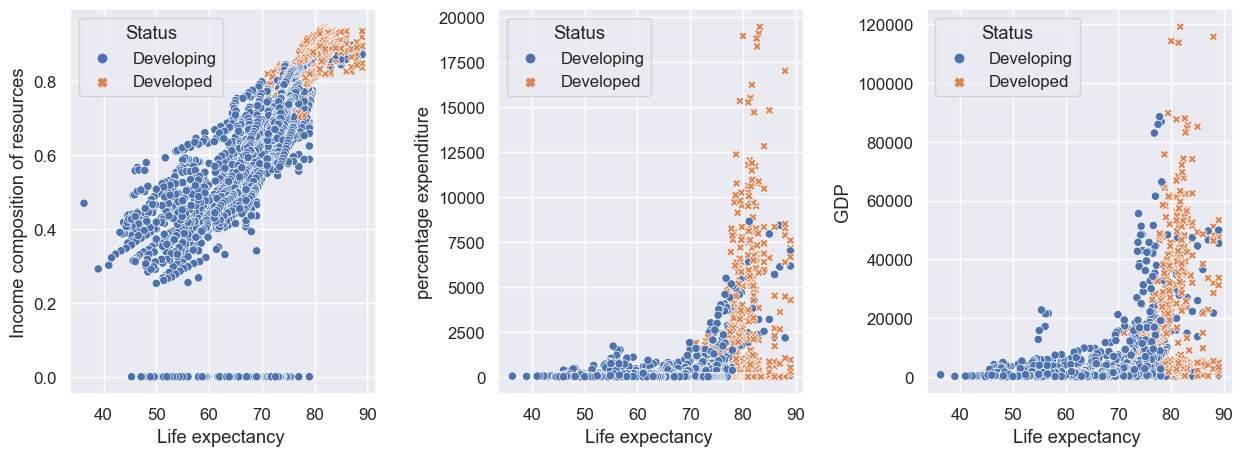

In [174]:
factors = ["Income composition of resources", "percentage expenditure", "GDP"]

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=None)

i = 1
for col_name in factors:
    plt.subplot(1,3,i)
    dc6= read.dropna(subset=['Life expectancy ', col_name])
    sns.scatterplot(data=dc6, x="Life expectancy ", y=col_name, hue="Status", style="Status")
    i += 1
    
#Як ми можемо прослідкувати по графіку, всі фактори що були взяті за основу впливають на якість життя

<AxesSubplot:xlabel='Life expectancy ', ylabel='Country'>

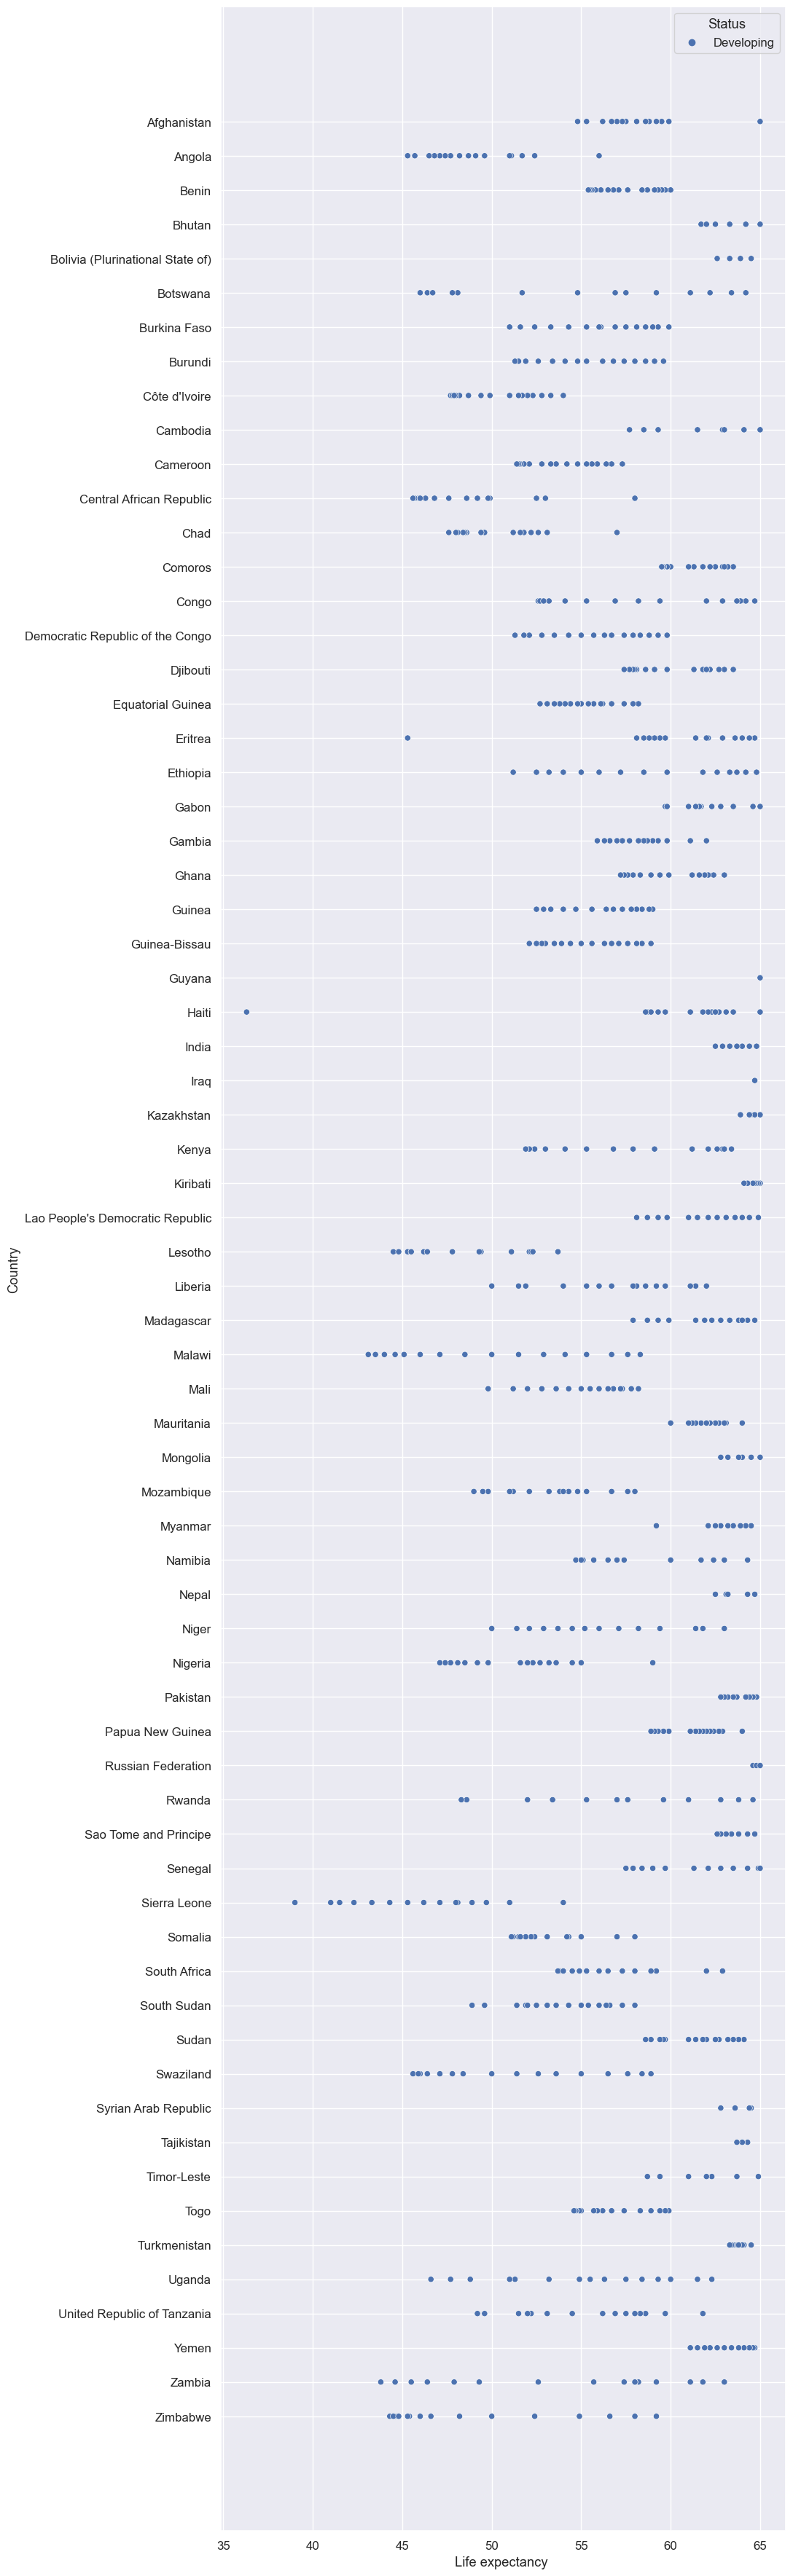

In [204]:
#Чи повинна країна з нижчим значенням очікуваної тривалості життя (<65) збільшити витрати на охорону здоров’я, 
#щоб покращити середню тривалість життя?


plt.figure(figsize=(10, 45))
plt.subplots_adjust(wspace=1, hspace=None)


rangedData = read[read['Life expectancy '].between(0,65)]


dc6= rangedData.dropna(subset=['Life expectancy ', 'Country'])
sns.scatterplot(data=dc6, x="Life expectancy ", y='Country', hue="Status", style="Status", norm = 5)

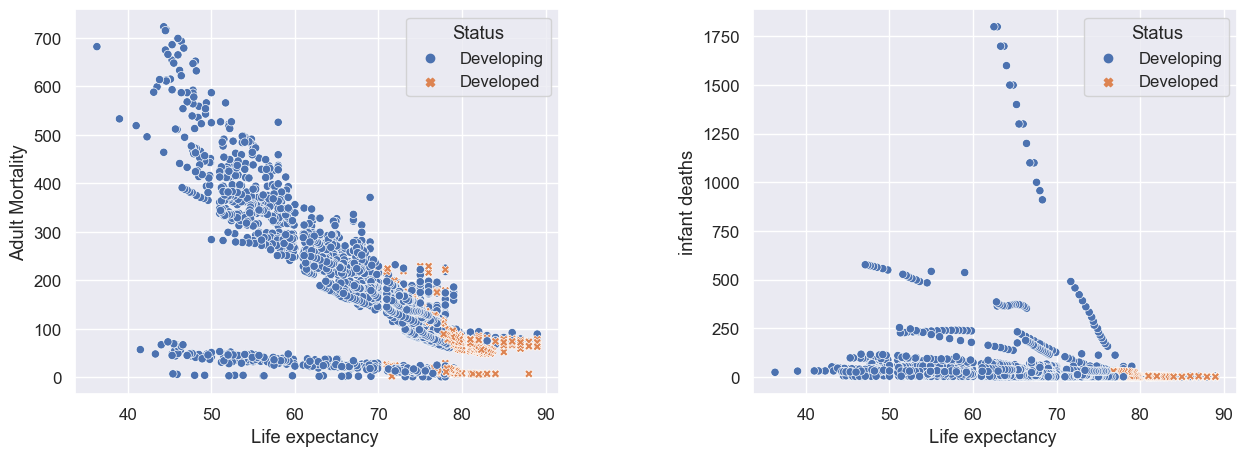

In [208]:
#Як рівень дитячої та дорослої смертності впливає на тривалість життя?
death = ['Adult Mortality', 'infant deaths']

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=None)

i = 1
for col_name in death:
    plt.subplot(1,2,i)
    dc6= read.dropna(subset=['Life expectancy ', col_name])
    sns.scatterplot(data=dc6, x="Life expectancy ", y=col_name, hue="Status", style="Status")
    i += 1
    
#Як ми можемо прослідкувати по графіку, всі фактори що були взяті за основу впливають на якість життя

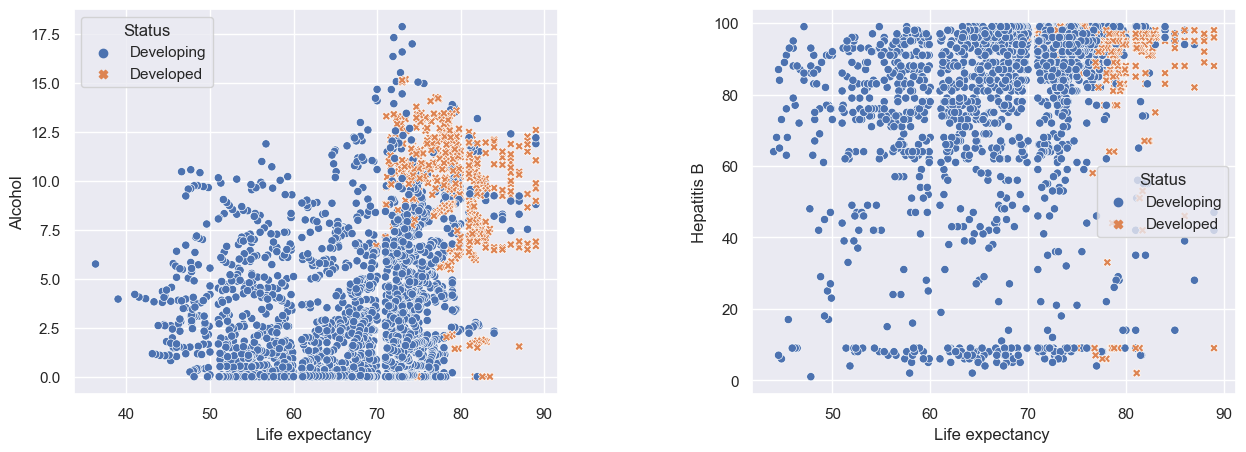

In [234]:
#Чи має очікувана тривалість життя позитивну чи негативну кореляцію зі звичками в їжі,
#способом життя, фізичними вправами, курінням, вживанням алкоголю тощо.

eat = ['Alcohol', 'Hepatitis B']

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=None)

i = 1
for col_name in eat:
    plt.subplot(1,2,i)
    dc6= read.dropna(subset=['Life expectancy ', col_name])
    sns.scatterplot(data=dc6, x="Life expectancy ", y=col_name, hue="Status", style="Status")
    i += 1
#Як ми можемо прослідкувати по графіку, всі фактори що були взяті за основу не впливають на якість життя

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

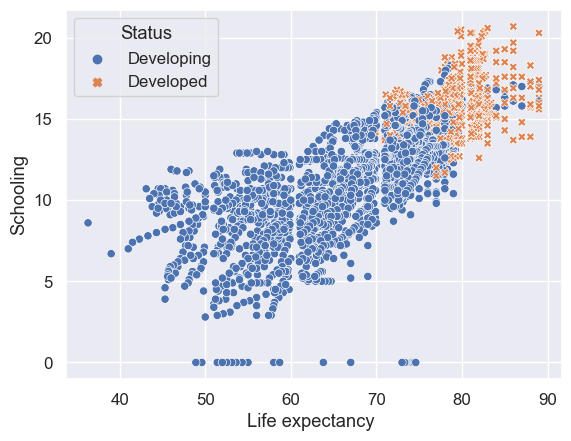

In [213]:
#Який вплив навчання в школі на тривалість життя людини?

dc6= read.dropna(subset=['Life expectancy ', 'Schooling'])
sns.scatterplot(data=dc6, x="Life expectancy ", y='Schooling', hue="Status", style="Status")

#Як ми можемо прослідкувати по графіку, всі фактори що були взяті за основу впливають на якість життя

<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

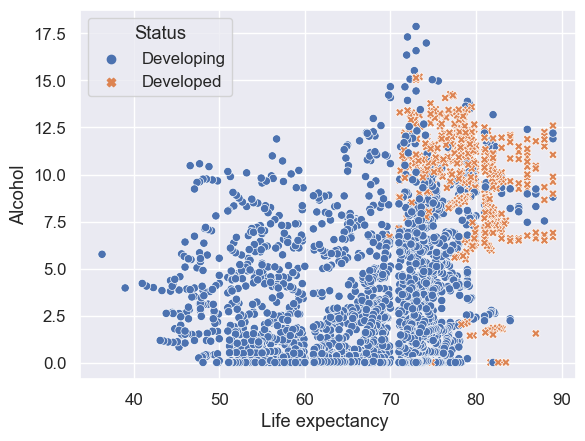

In [214]:
#Позитивний чи негативний зв’язок очікуваної тривалості життя з вживанням алкоголю?


dc6= read.dropna(subset=['Life expectancy ', 'Alcohol'])
sns.scatterplot(data=dc6, x="Life expectancy ", y='Alcohol', hue="Status", style="Status")

#Як ми можемо прослідкувати по графіку, всі фактори що були взяті за основу не впливають на якість життя